In [3]:
import pandas as pd
import numpy as np

In [92]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

## Read File

In [75]:
donors = pd.read_csv("donors.csv")

C:\Users\Madal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [76]:
donors.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [77]:
donors.drop(["Unnamed: 0"], axis=1, inplace= True)

In [6]:
donors.shape

(95412, 476)

In [7]:
donors.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

In [8]:
donors.isna().sum() #count of missing values

Unnamed: 0      0
ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
Length: 476, dtype: int64

In [79]:
data = donors.copy()

### Normalize Some Values and replacing empty String for Nans

In [80]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In [81]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [83]:
# replace " " by nans
data.drop(["SOLP3","SOLIH"],axis=1).replace(" ", np.nan, inplace=True)

### Dropping Columns with High percentege of missing values

In [85]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(donors.shape[1]-data.shape[1],"columns were removed")

62 columns were removed


### Defining metric and non-metric features

In [97]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

### Delete columns with same values

In [114]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        #print(lista[i])
        if len(set(data[lista[i]])) == 1:
            #print(len(set(data[lista[i]])))
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)
        
        
del_columns_with_one_elem(non_metric_features)

###  Fill missing values (Data imputation)

In [115]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [116]:
modes = data_central[non_metric_features].mode().loc[0]
modes.head(10)

ODATEDW     2015-01-01
OSOURCE            MBC
STATE               CA
ZIP              85351
PVASTATE              
DOB         1968-01-01
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
CHILD03               
Name: 0, dtype: object

In [117]:
data = data_central.copy()

### Dropping some variables

In [118]:
data.drop(['HHAGE1','HHAGE3','AGEC6','ETHC3'], axis=1, inplace=True)

In [119]:
data.drop(['HV1','HVP1','HVP2','HVP6'], axis=1, inplace=True)

In [ ]:
data.drop(['ETHC5','ETH2','ETHC4'], axis=1, inplace=True)

In [122]:
data.drop(['POP901','POP903'], axis=1, inplace=True)

In [123]:
data.drop(['HHD9'], axis=1, inplace=True)

In [124]:
data.drop(['LFC5','LFC3'], axis=1, inplace=True)

In [126]:
data.drop(['AFC2'], axis=1, inplace=True)

In [127]:
data.drop(['AGE906','AGE905','AGE903','AGE902'], axis=1, inplace=True)

In [128]:
data.drop(['IC1','IC3'], axis=1, inplace=True)

In [129]:
data.drop(['DW4','DW5','DW6','HUPA6'], axis=1, inplace=True)

In [130]:
data.drop(['LFC4','LFC2'], axis=1, inplace=True)

In [131]:
data.drop(['RHP1','HUR2'], axis=1, inplace=True)

In [132]:
data.drop(['IC14'], axis=1, inplace=True)

In [133]:
data.drop(['HHP1','RHP3','HHN3','HHN4','HHD1','HHD2'], axis=1, inplace=True)

In [134]:
data.drop(['LSC2','ETH13'], axis=1, inplace=True)

In [135]:
data.drop(['OCC9'], axis=1, inplace=True)

In [136]:
data.drop(['IC11'], axis=1, inplace=True)

In [137]:
data.drop(['AGE901'], axis=1, inplace=True)

In [138]:
data.drop(['DW2'], axis=1, inplace=True)

In [ ]:
data.drop(['AFC5'], axis=1, inplace=True)

In [139]:
data.drop(['IC10'], axis=1, inplace=True)

In [140]:
data.drop(['IC12'], axis=1, inplace=True)

In [141]:
data.drop(['CARDPROM'], axis=1, inplace=True)

In [142]:
data.drop(['HV3','RP1'], axis=1, inplace=True)

In [143]:
data.drop(['HC18','HC17','HC7','HC8','HC6'], axis=1, inplace=True)

In [144]:
data.drop(['IC13'], axis=1, inplace=True)

In [145]:
data.drop(['AGE907'], axis=1, inplace=True)

In [146]:
data.drop(['HHD3'], axis=1, inplace=True)

In [147]:
data.drop(['RP2','RP3'], axis=1, inplace=True)

In [148]:
data.drop(['CARDGIFT'], axis=1, inplace=True)

In [149]:
data.drop(['MARR3','HHAGE2'], axis=1, inplace=True)

In [150]:
data.drop(['HHD4'], axis=1, inplace=True)

In [151]:
data.drop(['HHN5', 'HHN6'], axis=1, inplace=True)

In [152]:
data.drop(['HHD11'], axis=1, inplace=True)

In [153]:
data.drop(['HU2'], axis=1, inplace=True)

In [154]:
data.drop(['IC15','IC6'], axis=1, inplace=True)

In [155]:
data.drop(['HC4','HC5'], axis=1, inplace=True)

In [156]:
data.drop(['IC9'], axis=1, inplace=True)

In [157]:
data.drop(['IC5','IC2'], axis=1, inplace=True)

In [158]:
data.drop(['IC7'], axis=1, inplace=True)

In [159]:
data.drop(['ETH4'], axis=1, inplace=True)

In [210]:
data.drop(['HC20','HC21'], axis=1, inplace=True)

In [211]:
data.drop(['CHILC1'], axis=1, inplace=True)

In [212]:
data.drop(['STATEGOV'], axis=1, inplace=True)

In [213]:
data.drop(['IC8'], axis=1, inplace=True)

In [214]:
data.drop(['HUPA5','HUPA1'], axis=1, inplace=True)

In [215]:
data.drop(['HVP3','HVP4','HVP5'], axis=1, inplace=True)

In [209]:
data.drop(['PVASTATE'], axis=1, inplace=True)

In [216]:
data.shape

(95412, 333)

In [217]:
data["TCODE"]=data["TCODE"].astype(object)
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [218]:
data[metric_features].shape

(95412, 258)

In [219]:
data[metric_features].head()

,MAILCODE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,YEAR,MONTH,LDYears,LDMonths,AGE,AGE_FREQ
0,0,0,0,0,0,0,4.0,6.0,0,0,...,7.741935,95515,0,4,1957,12,2,11,60,862
1,0,0,0,0,0,0,6.0,9.0,16,0,...,15.666667,148535,0,2,1972,12,2,11,45,1596
2,0,0,0,0,0,0,3.0,1.0,2,0,...,7.481481,15078,1,4,1968,12,2,11,49,25795
3,0,0,0,0,0,0,1.0,4.0,2,0,...,6.812500,172556,1,4,1948,12,2,11,69,1768
4,0,0,1,1,0,0,3.0,2.0,60,1,...,6.864865,7112,1,2,1940,1,1,0,77,1942


In [220]:
data[non_metric_features].shape

(95412, 75)

In [221]:
data[non_metric_features].head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,...,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,Lapsed Donor
0,2009-01-01,GRI,0,IL,61081,1957-12-01,XXXX,T2,,,...,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C,
1,2014-01-01,BOA,1,CA,91326,1972-02-01,XXXX,S1,H,,...,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A,
2,2010-01-01,AMH,1,NC,27017,1968-01-01,XXXX,R2,U,,...,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C,
3,2007-01-01,BRY,0,CA,95953,1948-01-01,XXXX,R2,U,,...,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X,C,
4,2006-01-01,,0,FL,33176,1940-01-01,XXXX,S2,H,,...,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X,A,LD


### Outlier Removal

In [173]:
data_out = data.copy()
data_out.shape

(95412, 342)

In [222]:
#Isto não está a funcionar
ql = data_out.quantile(.005)
qh = data_out.quantile(.995)
iqr = (qh - ql)

#podia-se fazer a visualizacao dos outliers com a box plot...

upper_lim = qh + 1.5 * iqr
lower_lim = ql - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_out[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
data_out = data[filters]
#print('Percentage of data kept after removing outliers:', np.round(data_out.shape[0] / data_original.shape[0], 4))
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_out.shape[0] / donors.shape[0], 4),3)*100, "%")

KeyError: 'AGE'

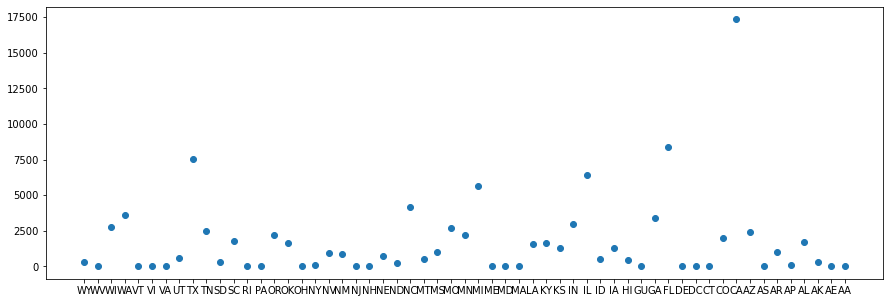

In [168]:
import matplotlib.pyplot as plt

states = data.STATE.value_counts().sort_index(ascending=False).to_frame()
plt.figure(figsize=(15,5))
plt.scatter(states.index, states["STATE"])
plt.show()

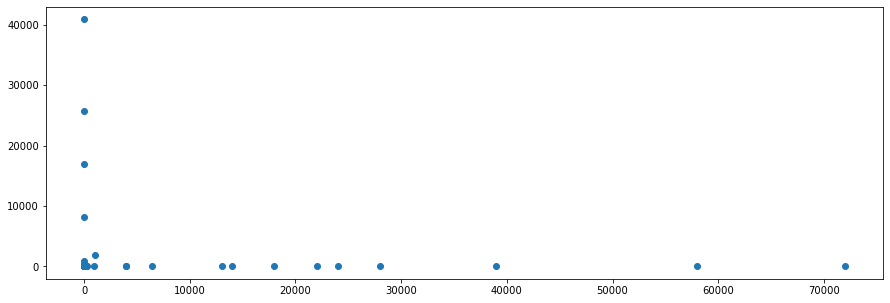

In [169]:
titles = data.TCODE.value_counts().sort_index(ascending=True).to_frame()


plt.figure(figsize=(15,5))
plt.scatter(titles.index, titles["TCODE"])
plt.show()

In [170]:
birth_date = data.DOB.value_counts().sort_index(ascending=False).to_frame()
#birth_date["date"] = birth_date.index
birth_date.index =  pd.to_datetime(birth_date.index)

birth_date = birth_date.groupby(pd.Grouper(freq="Y")).sum()


In [171]:
birth_date = birth_date[(birth_date.T != 0).any()]
birth_date

,DOB
1930-12-31,831
1931-12-31,593
1932-12-31,972
1933-12-31,738
1934-12-31,1255
...,...
2012-12-31,1
2013-12-31,2
2015-12-31,5
2016-12-31,6


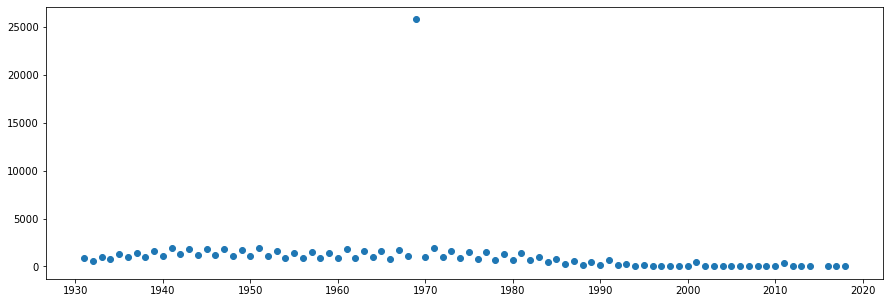

In [172]:
plt.figure(figsize=(15,5))
plt.scatter(birth_date.index, birth_date["DOB"])
plt.show()

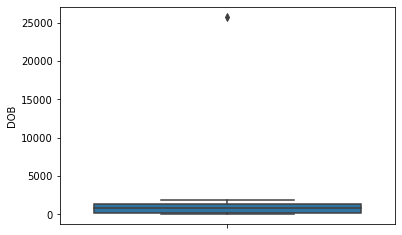

In [176]:
# Single Metric Variable Box Plot
import seaborn as sns
sns.boxplot(y=birth_date["DOB"])

plt.show()

In [19]:
#pct_home_val = donors.loc[:,"IC1":"IC20"]
                                     

In [20]:
#pct_home_val
#Pelo que eu percebi, por exemplo, a partir do IC5 são percentagens e nao valores exatos. Essas percentagens correspondem
# a valores baseados literalmente nas vizinhanças/bairros dessas pessoas.
#Por exemplo, o IC8 é #Percent Households w/ Income $25,000 - $34,999", como não se pode devolver a percentagem com base 
# numa unica observação, que seria a própria row, pelos vistos esta organização contratou uma empresa que basicamente,
#vende dados. O critério com que as percentagens são feitas é baseada na proximidade/vizinhança/bairro/rua/codigo postal idk
# e faz a percentagem a partir daí
#Mais infos no moodle no forum

In [21]:
first_gift = data.ODATEDW.value_counts().sort_index(ascending=False).to_frame()
#birth_date["date"] = birth_date.index
first_gift.index =  pd.to_datetime(first_gift.index)

first_gift = first_gift.groupby(pd.Grouper(freq="Y")).sum()


In [22]:
first_gift = first_gift[(first_gift.T != 0).any()]
first_gift

,ODATEDW
2003-12-31,1
2004-12-31,1
2005-12-31,2
2006-12-31,14601
2007-12-31,3455
2008-12-31,6671
2009-12-31,5347
2010-12-31,7724
2011-12-31,8557
2012-12-31,7549


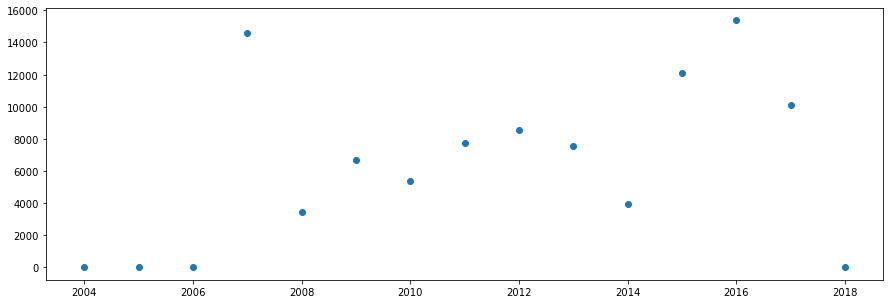

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(first_gift.index, first_gift["ODATEDW"])
plt.show()

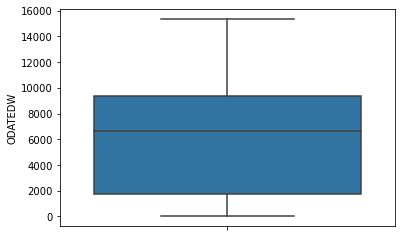

In [24]:
sns.boxplot(y=first_gift["ODATEDW"])

plt.show()

In [80]:
pearsoncorr = donors.loc[:,["NUMCHLD","AVGGIFT"]].corr(method='pearson')
pearsoncorr

,NUMCHLD,AVGGIFT
NUMCHLD,1.000000,-0.018747
AVGGIFT,-0.018747,1.000000


In [81]:
pearsoncorr = donors.loc[:,["INCOME","AVGGIFT"]].corr(method='pearson')
pearsoncorr

,INCOME,AVGGIFT
INCOME,1.000000,0.114931
AVGGIFT,0.114931,1.000000


(array([47675.,     0.,     0., 20545.,     0.,     0., 15291.,     0.,
            0., 11901.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

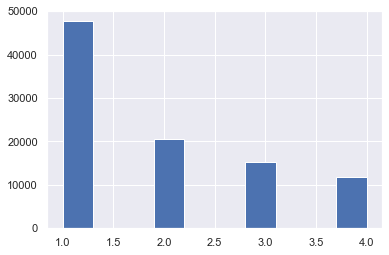

In [96]:
plt.hist(donors["RFA_2F"],bins=10)
#1=One gift in the period of recency
#2=Two-Four gifts in the period of recency
#5=Five+ gifts in the period of recency


(array([21639.,     0.,     0., 19397.,     0.,     0., 46964.,     0.,
            0.,  7412.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

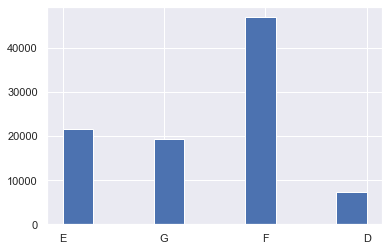

In [162]:
plt.hist(donors["RFA_2A"])
#DE ACORDO COM O GRAFICO
#E=$10.00 - $14.99
#G=$25.00 and above
#F=$15.00 - $24.99
#D=$5.00  -  $9.99

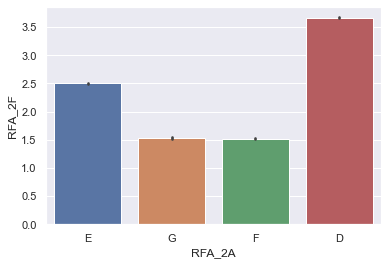

In [168]:
sns.barplot(x="RFA_2A", y="RFA_2F", data=donors)

(array([22228.,     0.,     0.,     0.,     0., 52354.,     0.,     0.,
            0., 20830.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

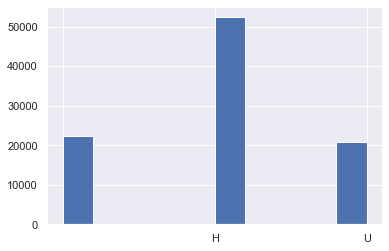

In [117]:
plt.hist(donors["HOMEOWNR"])

In [15]:
import seaborn as sns

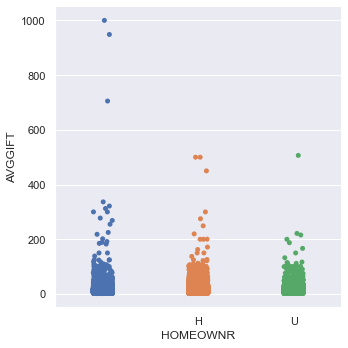

In [144]:
sns.catplot(x="HOMEOWNR", y="AVGGIFT", data=donors)

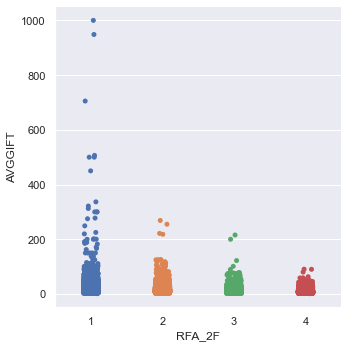

In [129]:
sns.catplot(x="RFA_2F", y="AVGGIFT", data=donors)

In [143]:
pearsoncorr = donors.loc[:,["RFA_2F","AVGGIFT"]].corr(method='pearson')
pearsoncorr

,RFA_2F,AVGGIFT
RFA_2F,1.000000,-0.277168
AVGGIFT,-0.277168,1.000000


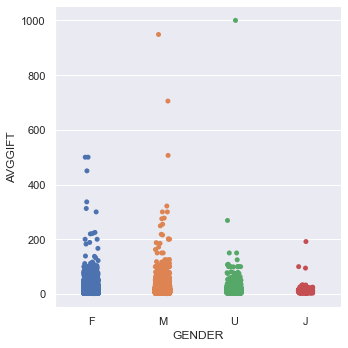

In [148]:
#sns.catplot(x="GENDER", y="AVGGIFT", data=donors)
#M = Male
#F = Female
#U = Unknown
#J = Joint Account, unknown gender
donors["GENDER"].replace({' ':'U', 'C':'U','A':'U'}, inplace=True)
sns.catplot(x="GENDER", y="AVGGIFT", data=donors)

In [202]:
donors["HOMEOWNR"].replace([' '],'U',inplace=True)
donors["GENDER"].replace({' ':'U', 'C':'U','A':'U'}, inplace=True)

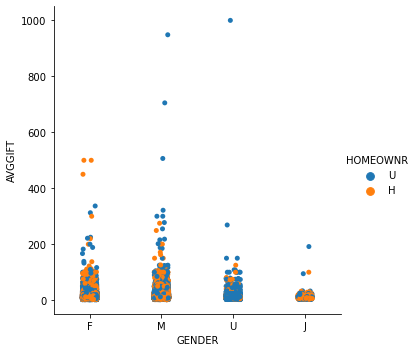

In [203]:
sns.catplot(x="GENDER", y="AVGGIFT", hue="HOMEOWNR", data=donors)

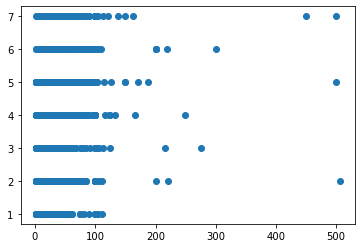

In [17]:
plt.scatter(donors["AVGGIFT"], donors["INCOME"])
plt.show()

C:\Users\Madal\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Madal\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2413., 3454., 4085., 4237., 4810., 5280., 5825., 6198., 6793.,
        7585.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

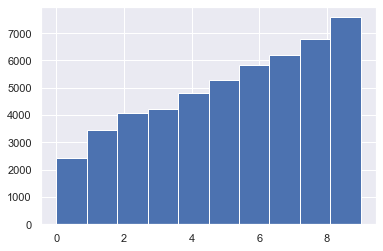

In [154]:
plt.hist(donors["WEALTH1"])

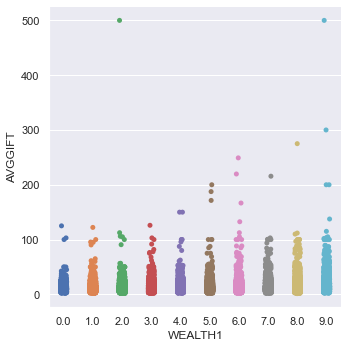

In [156]:
sns.catplot(x="WEALTH1", y="AVGGIFT", data=donors)

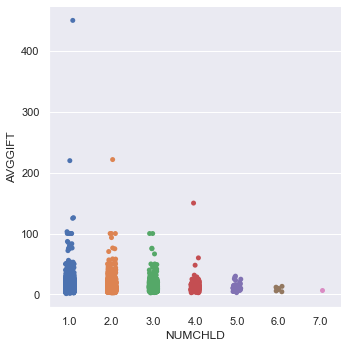

In [157]:
sns.catplot(x="NUMCHLD", y="AVGGIFT", data=donors)

In [225]:
from pandas_profiling import ProfileReport

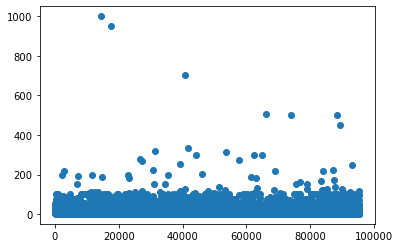

In [19]:
plt.scatter(donors.index, donors["AVGGIFT"])
plt.show()

In [11]:
#donors["LASTDATE"]

In [12]:
#donors["LASTDATE"] = pd.to_datetime(donors["LASTDATE"])
#donors["NEXTDATE"] = pd.to_datetime(donors["NEXTDATE"])

In [73]:
lastdate = donors["LASTDATE"].value_counts().sort_index(ascending=False).to_frame()
lastdate.index =  pd.to_datetime(lastdate.index)
lastdate = lastdate.groupby(pd.Grouper(freq="Y")).sum()

In [74]:
lastdate = lastdate[(lastdate.T != 0).any()]
lastdate

,LASTDATE
2015-12-31,57452
2016-12-31,36387
2017-12-31,1573


In [178]:
df= data['LASTDATE'].str.split("-",expand=True)
data['YEAR'] = df[0]
data['MONTH'] = df[1]
data["YEAR"]=data["YEAR"].astype(int)
data['MONTH'] = data['MONTH'].astype(int)
data["LDYears"] = 2017- data["YEAR"]


In [179]:
data['LDMonths'] = data["MONTH"] - 1
cv = data[["LDYears",'LDMonths']]
cv1 = cv[cv.LDYears < 2 ]
cv1 = cv1[cv1.LDYears > 0 ]
lapsedDonors = cv1[cv1.LDMonths < 12]
lapsedDonors

,LDYears,LDMonths
4,1,0
10,1,1
12,1,0
13,1,11
20,1,2
...,...,...
95406,1,1
95407,1,1
95408,1,2
95409,1,9


In [189]:
data['Lapsed Donor'] = np.where(data.index.isin(lapsedDonors.index), 'LD', '')

In [204]:
df= data['DOB'].str.split("-",expand=True)
data['YEAR'] = df[0]
data["YEAR"]=data["YEAR"].astype(int)
data["AGE"] = 2017- data["YEAR"]
data["AGE"]

0        60
1        45
2        49
3        69
4        77
         ..
95407    49
95408    47
95409    59
95410    57
95411    79
Name: AGE, Length: 95412, dtype: int32

In [197]:
data['AGE_FREQ'] = data.groupby('AGE')['AGE'].transform('count')
data['AGE_FREQ']

0          862
1         1596
2        25795
3         1768
4         1942
         ...  
95407    25795
95408     1890
95409     1449
95410     1770
95411     1577
Name: AGE_FREQ, Length: 95412, dtype: int64

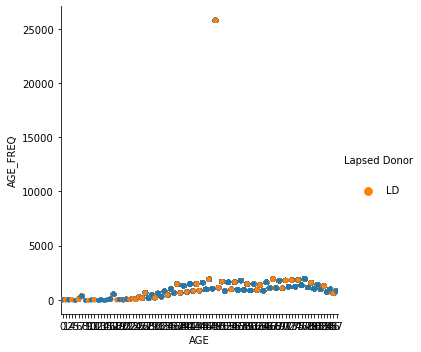

In [198]:
sns.catplot(x="AGE", y="AGE_FREQ", hue="Lapsed Donor", data=data)

In [ ]:
#for i in non_metric_features:   
 #   bar_charts_categorical(data, i, "Lapsed Donor")

In [206]:
from math import ceil

In [225]:
#sns.set()
#fig, axes = plt.subplots(len(metric_features), ceil(len(metric_features) / len(metric_features)), figsize=(20, 20))
#for ax, feat in zip(axes.flatten(), metric_features):
#    sns.boxplot(x=data[feat], ax=ax) 
#plt.show()